# TP1

Thomas Vaudescal : **11237578**

William Delisle  : **11313171**

Sébastien Caron  : **11271997**

# Question 1

Une action ne versant pas de dividende cote présentement à 100. Le taux sans risque à 1 mois est de 5%. Vous observez sur le marché les prix suivants pour des puts européens venant à maturité dans 1 mois:

In [ ]:
from utils import *

tic()

# use 4 decimals for tables
pd.options.display.float_format = "{:,.4f}".format

In [ ]:
info = get_info()
info

,Strike,Put
0,80.0000,0.1900
1,90.0000,0.6907
2,97.5000,1.6529
3,102.5000,3.3409
4,110.0000,9.8399
5,120.0000,19.5805


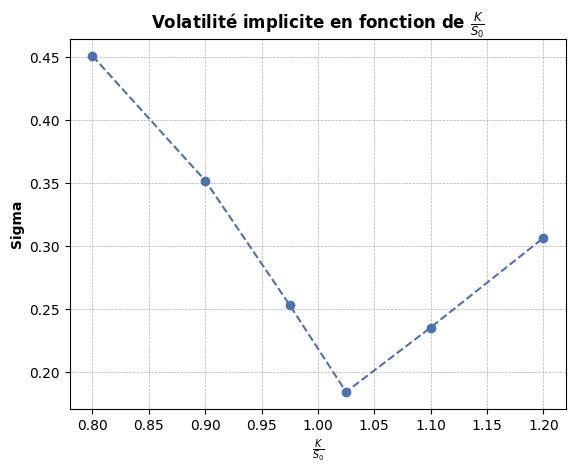

In [ ]:
# Données
S_0 = 100.0
r_f = 0.05
T   = 1.0 / 12.0

# Calcul des volatilités implicites
sigma = [
    implied_volatility(opt_price=P, S=S_0, K=K, r=r_f, y=0, T=T, is_call=False)[0]
    for K, P in info.values
]
info["Implied vol."] = sigma

plot_implied_vol(S_0, info)

Quelles sont les volatilités implicites ('IV') de ces puts? Tracez le graphe des ces IV en fonction de $K/S$ et discutez brièvement.

Sur le graphique précédent, nous observons que la volatilité implicite tend à former un "smile" en fonction de la "moneyness". En effet, nous observons que la volatilité implicite est supérieure lorsque l'option est plus loin dans la monnaie ($\frac{K}{S_0} > 1$) ou hors de la monnaie ($\frac{K}{S_0} < 1$), et est minimale à la monnaie ($\frac{K}{S_0} = 1$). Ce phénomène n'est pas prévu par le modèle de BMS, qui prend comme hypothèse que la volatilité est constante pour tout prix d'exercice.

Il est d'ailleurs intéressant de remarquer que le 'smile' n'a pas une forme symétrique. En effet, la pente de la courbe de la volatilité implicite pour les puts hors de la monnaie ($\frac{K}{S_0} < 1$) est plus grande que la pente pour les puts dans la monnaie. Une des explications possibles pour ce phénomène vient du fait que les puts hors de la monnaie ont plus de valeurs, car ils sont utilisés par les investisseurs comme une forme d'assurance ou de protection contre une baisse du prix du sous-jacent (grande demande, donc prix plus élevé).

# Question 2

Vous vous intéressez à ces options parce que vous avez, d'autre part, 
émis des produits structurés contenant des puts de même strikes, mais permettant un exercice à tout moment d'ici la maturité. Pour chacun de ces strike, vous désirez donc utiliser un arbre CRR afin de valoriser l'option américaine correspondante.

En premier lieu, vous désirez donc étudier la convergence de votre arbre vers le prix BMS pour les européennes observées sur le marché. Pour des valeurs de $N$ allant de 2 à 100 (`range(2,101)`), tracer, dans une figure 
`
    fig, axes = plt.subplots(3, 2, figsize=(15,20))
`
avec une sous-figure par strike,

* Le prix CRR obtenu pour chaque $N$
* Une ligne horizontale traitillée au prix de marché
* Deux ligne horizontales pointillées à $\pm$1 bp du prix de marché

Discutez brièvement de la qualité de la convergence.

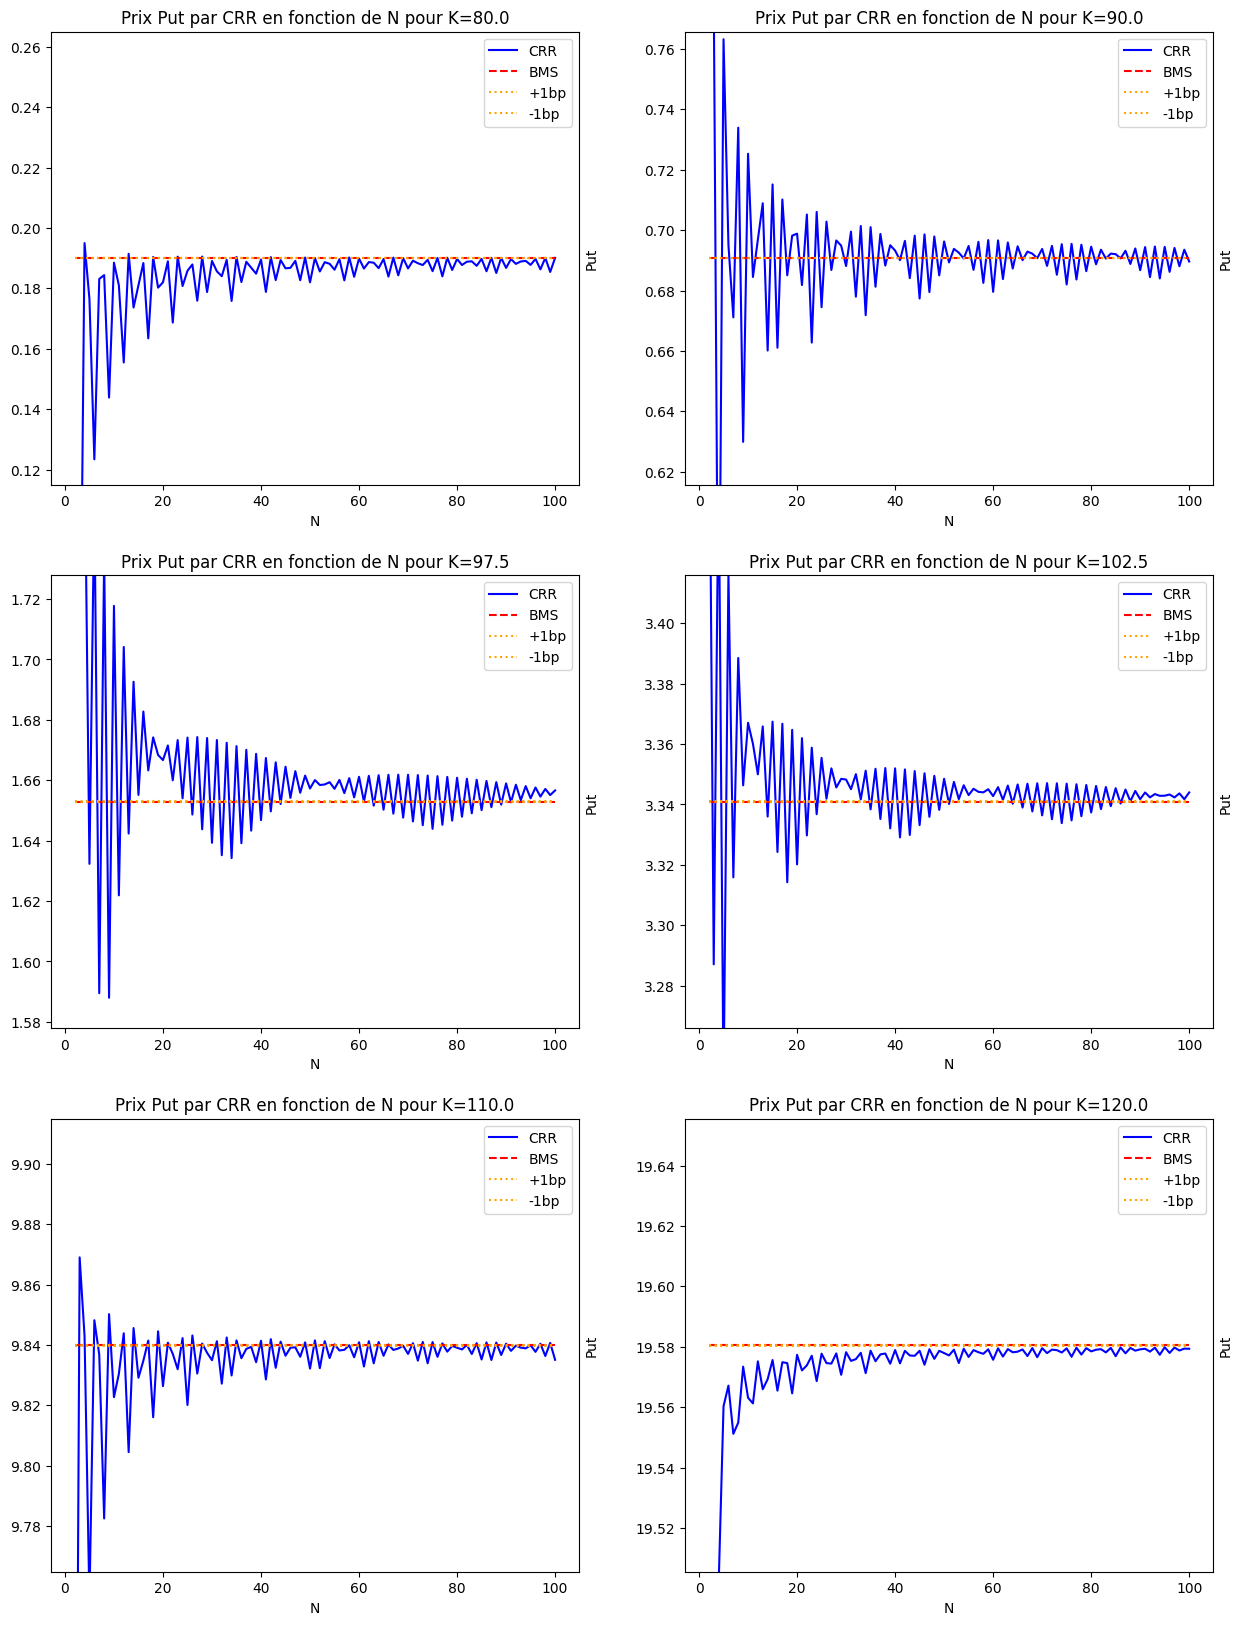

In [ ]:
N_Range = np.arange(2, 101, 1)
df_CRR  = CRR_tree_df(
    S       = S_0,
    K       = info["Strike"],
    T       = T,
    r       = r_f,
    sigma   = info["Implied vol."],
    Type    = 0,
    N_Range = N_Range,
)

plot_CRR_tree(df_CRR_list=[[df_CRR, "CRR", "b"]], N_Range=N_Range, zoom_factor=750)

À première vue, on remarque que après 100 pas de temps, l'arbre binomial CRR peine à converger vers la valeur théorique du put selon BMS. De plus, on remarque que pour de petites valeurs de N, l'erreur est très importante. Au fur et à mesure que N augmente, on observe que l'arbre binomial converge lentement, mais toujours avec beaucoup de variabilité dans les estimations. On remarque aussi que les oscillations dépendent de si le nombre de pas de temps N est pair ou impair. On sait que l'espérance du log-rendement de l'arbre binomial $\mathbb{E}\left[ln\left(\frac{S(t_n)}{S}\right)\right]$ est équivalente à l'espérance du log-rendement dans le modèle de BMS. On sait aussi que la variance de l'arbre binomial de CRR tend asympotiquement vers la variance du modèle de BMS en fonction du nombre de pas de temps. Cela expliquerait donc pourquoi la variance de l'arbre CRR semble lentement diminuer en fonction du pas de temps N sur les graphiques.

# Question 3

Répétez la figure ci-haut, en vous concentrant sur les pas $N = range(400, 501)$. 
Ajoutez aussi, pour chaque strike, une courbe raportant la valeur obtenu à $N$ avec l'arbre CRR ajusté à l'aide de la correction de Broadie et Detemple. Comparez les deux méthodes. En particulier, soulignez l'avantage de l'ajustement quand viendra le temps de choisir un nombre de pas de temps respectant une tolérance de $\pm$ 1bp.

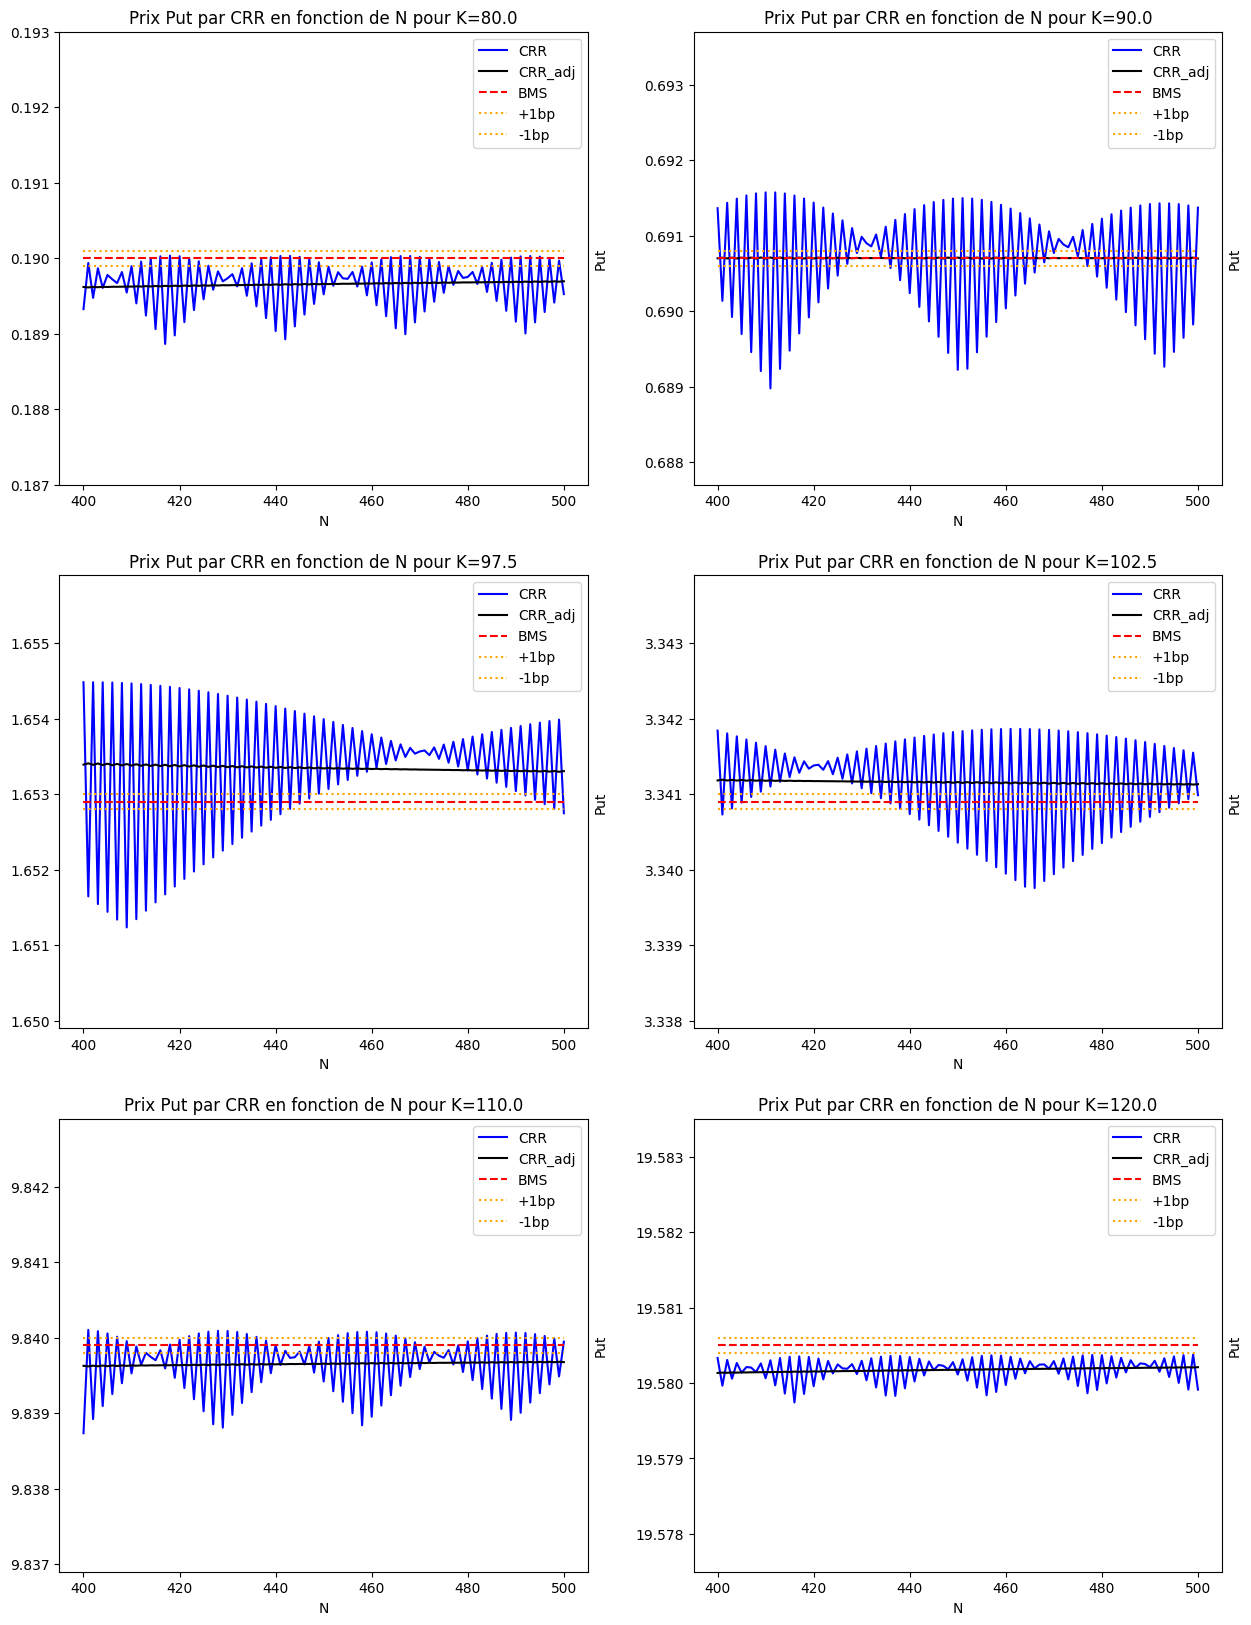

In [ ]:
N_Range = np.arange(400, 501)
df_CRR  = CRR_tree_df(
    S       = S_0,
    K       = info["Strike"],
    T       = T,
    r       = r_f,
    sigma   = info["Implied vol."],
    Type    = 0,
    N_Range = N_Range,
)

df_CRR_BD = CRR_tree_BD_df(
    S       =S_0,
    K       =info["Strike"],
    T       = T,
    r       = r_f,
    sigma   = info["Implied vol."],
    Type    = 0,
    N_Range = N_Range,
)

plot_CRR_tree(
    df_CRR_list = [[df_CRR, "CRR", "b"], [df_CRR_BD, "CRR_adj", "k"]],
    N_Range     = N_Range,
    zoom_factor =30,
)

On remarque que même avec plus de pas de temps, la méthode CRR classique semble toujours converger de façon oscillatoire vers le prix BMS. Par contre, lorsque la correction de Broadie et Detemple est appliquée, la convergence devient beaucoup plus lisse. L'avantage de ce comportement plus linéaire de la convergence avec l'arbre CRR ajusté est que, une fois la borne acceptable de convergence atteinte, l'arbre ajusté ne donnera plus de prix qui sorte de ces bornes acceptables. Il sera donc beaucoup plus facile de choisir un nombre de pas de temps qui respecte une tolérance puisqu'il suffira d'identifier le point où cette tolérance est atteinte. Cette technique d'identification ne fonctionnerait pas avec une covergence oscillatoire puisqu'une fois à l'intérieur de la tolérance, il serait possbile d'en ressortir.

De plus, il est intéressant de noter que, même si la correction de Broadie et Detemple a été developpée afin d'améliorer la convergence de l'arbre CRR lors de la tarification d'options américaines, la technique fonctionne aussi pour nos puts européens. C'est logique puisque l'idée de Broadie et Detemple était d'exploiter le caractère européen du dernier pas de temps dans l'arbre binomiale pour une option américaine. Or, pour une option européenne, le caractère du dernier pas de temps est évidemment aussi européen. 

# Question 4

En utilisant maintenant que les pas $N = range(500, 3001, 100)$, n'utilisez que l'arbre avec ajustement. Tracez à nouveau une figure de convergence 3x2. Combien de pas de temps sont nécessaires pour que tous les strikes respectent une tolérance de $\pm$ 1bp?

Assurez-vous aussi, pour chaque $N$, de calculer les 3 approximations suivantes du gamma:
\begin{align}
 \Gamma_0 &= \frac{p_{uu}-2p_{ud}+p_{dd}}{\left[(u-d) S\right]^{2}},
 \\
 \Gamma_1 &= \frac{
    \frac{(p_{uu}-p_{ud})}{u^{2}S-S} 
    - \frac{(p_{ud}-p_{dd})}{S-d^{2}S}
  }{Su - Sd},
 \\
 \Gamma_2 &= \frac{
    \frac{(p_{uu}-p_{ud})}{u^{2}S-S} 
    - \frac{(p_{ud}-p_{dd})}{S-d^{2}S}
  }{\frac{1}{2}(Su^2 - Sd^2)}.
\end{align}

Produisez une nouvelle figure de convergence, cette fois vers $\Gamma_{BMS}\pm 1bp$. Discutez brièvement.

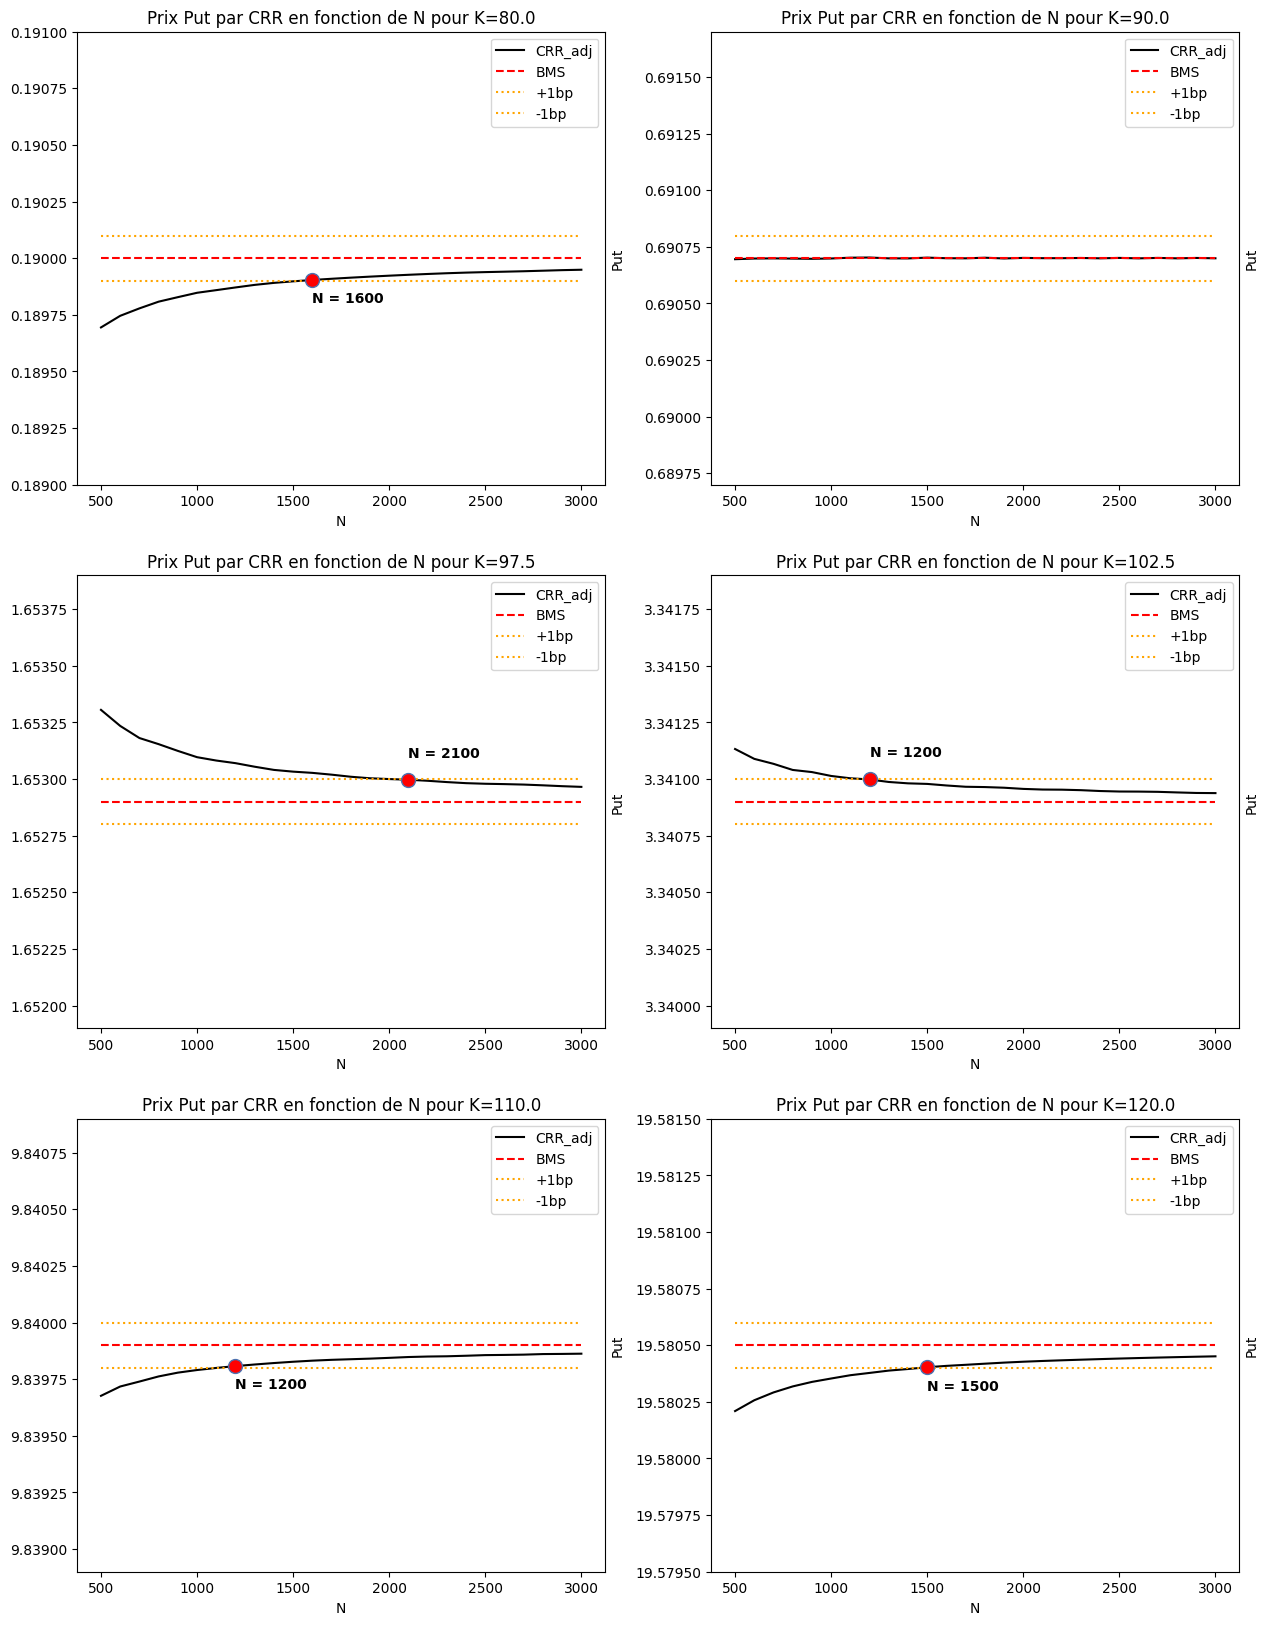

In [ ]:
N_Range   = np.arange(500, 3001, 100)
gamma_bms = [gamma(S=S_0, K=K, r=r_f, y=0, T=T, sigma=Sig) for K, _, Sig in info.values]

df_CRR_BD, gamma_BD = CRR_tree_BD_df(
    S         = S_0,
    K         = info["Strike"],
    T         = T,
    r         = r_f,
    sigma     = info["Implied vol."],
    Type      = 0,
    N_Range   = N_Range,
    ret_gamma = True,
)

plot_CRR_tree(
    df_CRR_list = [[df_CRR_BD, "CRR_adj", "k"]],
    N_Range     = N_Range,
    zoom_factor = 10,
    cross       = True,
)

En appliquant la correction de Broadie et Detemple, la convergence se fait aussi rapidement qu'avant 500 pas pour le put avec un strike à 90. C'est le put avec un strike de 97.5 qui prend le plus de temps à converger avec 2100 pas. C'est donc avec 2100 pas que tous les strikes respectent une tolérance de $\pm$ 1bp.

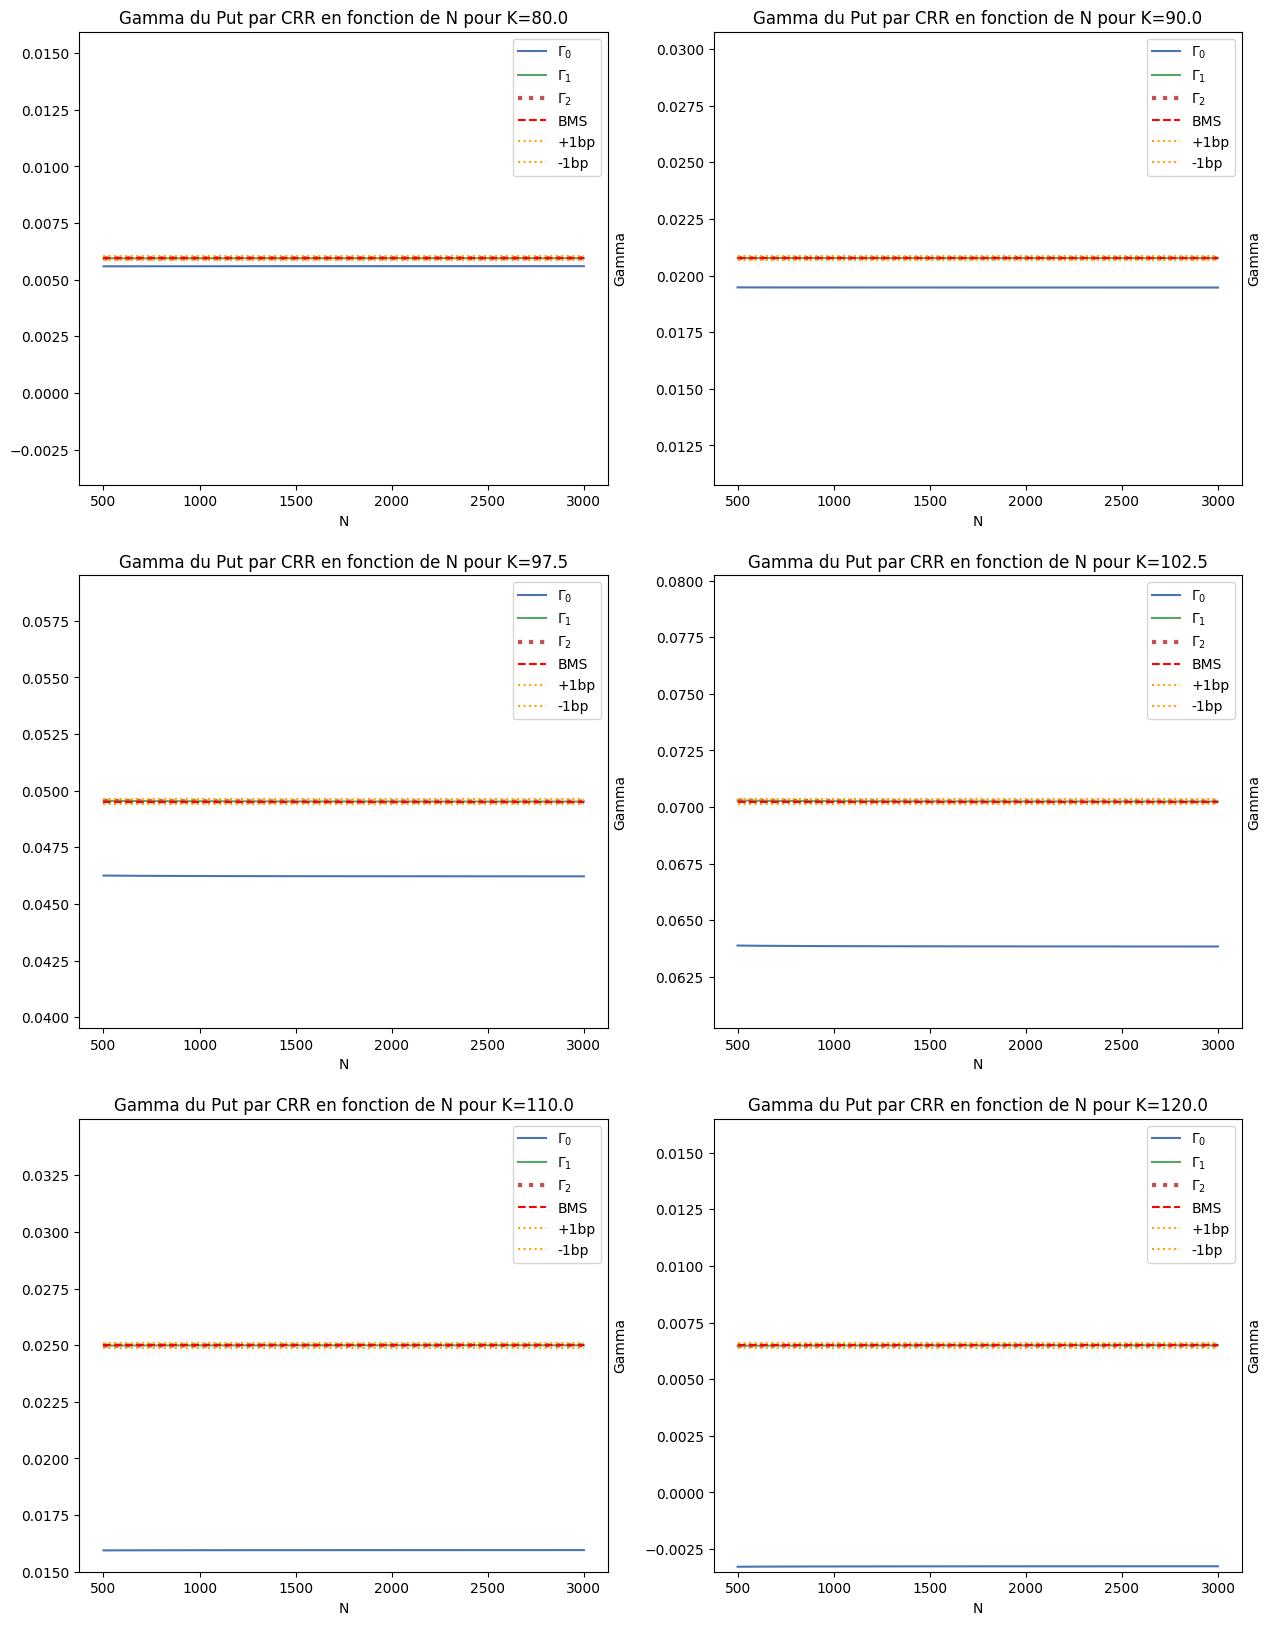

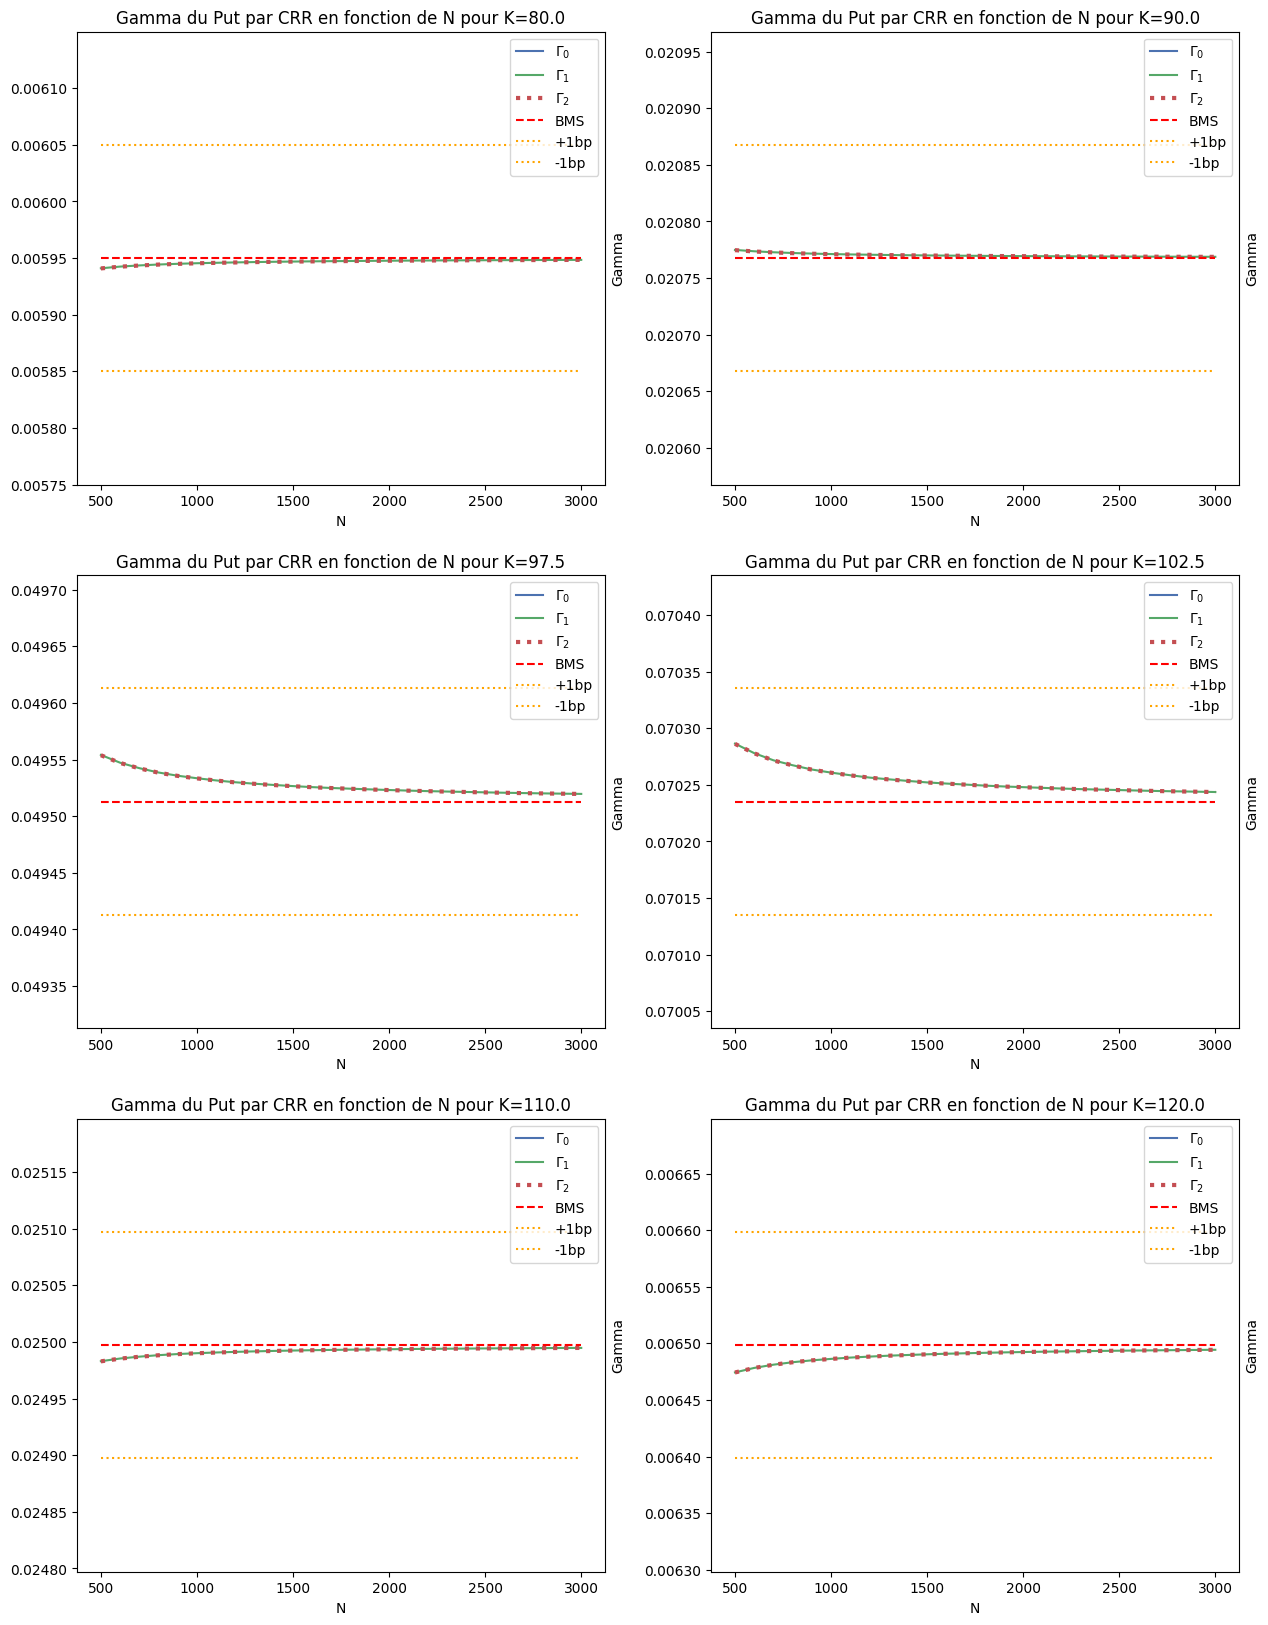

In [ ]:
plot_gamma(gammas=gamma_BD, gamma_bms=gamma_bms, N_Range=N_Range, zoom_factor=100)
plot_gamma(gammas=gamma_BD, gamma_bms=gamma_bms, N_Range=N_Range, zoom_factor=2)

Premièrement, les 6 graphiques ont été générés 2 fois afin de pouvoir bien montrer le comportement des 3 approximations du gamma. Les premiers graphiques qui ont été générés montrent que l'approximation du $\Gamma$ par $\Gamma_0$ est mauvaise. En effet, elle donne une valeur toujours inférieure au $\Gamma_{BMS}$ et aux autres approximations, sans jamais entrer dans la tolérance de $\pm$ 1bp. Elle va même jusqu'à donner une valeur négative pour le strike de 120. Or, un $\Gamma$ négatif ne fait pas de sens. 

Pour ce qui est des deuxièmes graphiques générés, ils montrent une convergence de l'approximation par $\Gamma_1$ et $\Gamma_2$ vers $\Gamma_{BMS}$. Cette convergence se fait même plus rapidement que la convergence des valeurs des puts. Il est aussi intéressant de noter que $\Gamma_1$ et $\Gamma_2$ se comporte exactemement de la même façon.

Par ailleurs, il est logique que l'approximation par $\Gamma_1$ est plus précise que celle par $\Gamma_0$. Rappelons que $\Gamma_0$ s'obtient par la discrétisation de la dérivée seconde par rapport au sous-jacent. Quant à $\Gamma_1$, il s'obtient en le définissant comme la dérivée première du $\Delta$ par rapport au sous-jacent, où $\Delta$ s'obtient par la discrétisation de la dérivée première par rapport au sous-jacent. Bref, l'erreur commise par $\Gamma_0$ sera plus grande car l'erreur de discrétisation associée à une dérivée seconde est plus grande que l'erreur de discrétisation associée à une dérivée première.

# Question 5
Soit $N^*$ le nombre de pas de temps nécessaire à une convergence pour les 6 strikes (cf. Question 4). Ajoutez à la table dans l'énoncé de la Question 1 les colonnes suivantes:

`
colnames = ['IV','Amer','EarlyEx','Gamma_e','Gamma_a','Gamma_ex']
`

qui contiendront pour chaque strike, respectivement, la volatilité implicite (en Q1), la valeur de l'américaine, la prime associée à l'exercice anticipé et le gamma de l'européenne (BMS) et de l'américaine, et la différence entre les gammas.

Discutez.

In [ ]:
# Nombre de pas nécessaire à la convergence (voir Q4)
N_star  = 2100
N_Range = np.arange(N_star, N_star + 1)

# Calcul des valeurs des puts américains et des gammas
Amer, Gamma_a = CRR_tree_BD_df(
    S         = S_0,
    K         = info["Strike"],
    T         = T,
    r         = r_f,
    sigma     = info["Implied vol."],
    Type      = 1,
    N_Range   = N_Range,
    ret_gamma = True,
)

# Calcul des valeurs des puts euro et des gammas
Euro, Gamma_e = CRR_tree_BD_df(
    S         = S_0,
    K         = info["Strike"],
    T         = T,
    r         = r_f,
    sigma     = info["Implied vol."],
    Type      = 0,
    N_Range   = N_Range,
    ret_gamma = True,
)

# Mise en forme de de la table info
info["Amer"]     = list(Amer.iloc[0])
info["EarlyEx"]  = info["Amer"] - info["Put"]
info["Gamma_e"]  = [float(gamma_e["gamma_1"]) for gamma_e in Gamma_e]
info["Gamma_a"]  = [float(gamma_a["gamma_1"]) for gamma_a in Gamma_a]
info["Gamma_ex"] = info["Gamma_a"] - info["Gamma_e"]

info = info.rename(columns={"Implied vol.": "IV"})
info

,Strike,Put,IV,Amer,EarlyEx,Gamma_e,Gamma_a,Gamma_ex
0,80.0000,0.1900,0.4512,0.1904,0.0004,0.0059,0.0060,0.0000
1,90.0000,0.6907,0.3523,0.6939,0.0032,0.0208,0.0209,0.0002
2,97.5000,1.6529,0.2534,1.6684,0.0155,0.0495,0.0504,0.0009
3,102.5000,3.3409,0.1845,3.4083,0.0674,0.0702,0.0746,0.0044
4,110.0000,9.8399,0.2356,10.0660,0.2261,0.0250,0.0296,0.0046
5,120.0000,19.5805,0.3067,20.0000,0.4195,0.0065,0.0000,-0.0065


Pour commencer, nous avons calculé la valeur du put américain à l'aide de l'arbre binomial ajusté par Broadie et Detemple avec 2100 pas de temps (nombre de pas de temps nécessaire pour une convergence à tous les strikes, voir Q4). On remarque rapidement que la prime liée à l'exercice anticipé de l'option américaine est positive pour tous les prix d'exercice. On remarque aussi que cette prime est d'autant plus importante lorsque l'option est dans la monnaie. Ce comportement s'explique par la fait que l'optionalité additionnelle d'un put américain a un prix, et que plus l'option est dans la monnaie, plus le prix de cette optionalité sera élevé.

On remarque aussi que, autant pour les puts américains que européens, la gamma croit avec le prix d'exercice jusqu'à ce qu'on arrive au point où on est à la monnaie. Par la suite, le gamma redescend. Ce comportement est cohérent avec le fait que la fonction de prix des puts est concave et qu'on a un maximum de courbure lorsque le sous-jacent est au prix d'exercice. C'est d'ailleurs le fait que cette même fonction de prix de put tend vers une droite lorsqu'on est très profondémment dans ou hors de la monnaie qui fait en sorte que le gamma est à tout de fin pratique nul pour $K=80$ et $K=120$. En effet, très profondémment hors de la monnaie, la valeur du put tend vers 0 alors qu'il tend vers sa valeur intrinsèque quand on est très profondémment dans la monnaie. On a d'ailleurs un exemple avec le put américain de $K=120$ qui vaut exactement sa valeur intrinsèque.

Finalement, on voit que la différence entre les gammas européens et américains sont toujours positifs, sauf pour $K=120$. Le fait que cette différence soit toujours positive s'explique simplement par le fait que la convexité de la fonction de prix du put américain est supérieure à celle du put européen. En effet, si on pense à un put sur un sous-jacent avec un prix infini, alors le prix du put sera nul avec un gamma nul (peu importe si l'option est européenne ou américaine). On aura aussi que le put américain aura plus de valeur que le put européen si la valeur du sous-jacent est la même que le prix d'exercice. Bref, si les fonctions de prix partent tout les deux d'une valeur de 0 quand le prix du sous-jacent est infini que le prix de l'américaine est plus grand à la monnaie, inévitablement, la courbure de la fonction pour le put américain est plus grand que la courbure de la fonction pour le put européen. Pour ce qui est de la valeur négative pour $K=120$, c'est probablement dû à une erreur d'approximation qu'on fait lors de l'évaluation du gamma profondément dans la monnaie.

# Question 6

L'action sous étude à, historiquement, eu une volatilité $\sigma_0 = 16\%$. Vous croyez que cette mesure est adéquate pour le mois à venir. La simulation ci-après offre donc une représentation des scénarios possible (sous les hypothèses BMS).

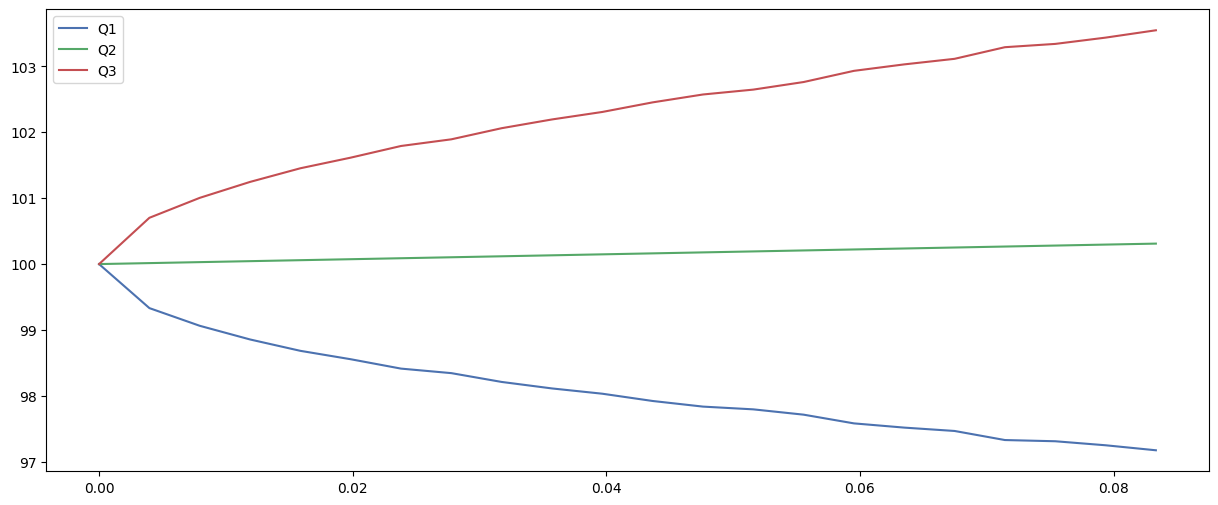

In [ ]:
sigma_0 = 0.16
dt      = 1 / 252  
n_days  = int(T / dt)
n_sim   = 10000
shocks  = antithetic_normal(n_days, n_sim)
S_t     = simulate_underlying(S_0, r_f, 0.0, sigma_0, dt, shocks)

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
time_t  = np.arange(S_t.shape[0]) * dt
stats   = pd.DataFrame(S_t.T).describe()

ax.plot(time_t, stats.T["25%"], label="Q1")
ax.plot(time_t, stats.T["50%"], label="Q2")
ax.plot(time_t, stats.T["75%"], label="Q3")
ax.legend();

Si les hypothèse BMS étaient effectivement respectées, quelle serait le prix des 6 puts 
d'intérêt pour une volatilité $\sigma_0$? Quelle est la différence $p_{mkt} - p_{bms}$? Que justifie cette différence selon vous?

In [ ]:
p_bms = option_price(
    S       = S_0, 
    K       = info["Strike"], 
    r       = r_f, 
    y       = 0, 
    T       = T, 
    sigma   = sigma_0, 
    is_call = False
)

p_mkt = list(info["Put"])
diff  = pd.DataFrame(
    np.vstack([p_mkt, p_bms, p_mkt - p_bms]).T, columns=["p_mkt", "p_bms", "Diff"]
)

diff

,p_mkt,p_bms,Diff
0,0.1900,0.0000,0.1900
1,0.6907,0.0130,0.6777
2,1.6529,0.7208,0.9321
3,3.3409,3.0793,0.2616
4,9.8399,9.5867,0.2532
5,19.5805,19.5011,0.0794


Pour chacun des 6 puts européen mentionnés précédemment, vous souhaitez utiliser les simulations ci-haut afin d'évaluer une stratégie de delta-hedging, sous l'hypothèse que vous avez vendu le put en question (négliger le multiplicateur de 100 ici). À tous moment $t = n\Delta t$, vous calculerez le delta de chaque put en utilisant la $\sigma(t,K)$ définie comme suit:
\begin{equation*}
    \sigma^2(t,K) = \sigma_0^2 + \frac{T - t}{T} (IV^2(0,K) - \sigma_0^2)
\end{equation*}
Quelle hypothèse faites-vous, implicitement? Cette hypothèse est-elle raisonnable en pratique?

Produisez une sous-figure par strike (`fig, axes = plt.subplots(3, 2, figsize=(15,20))`), chacune rapportant l'histogramme de la valeur finale de votre compte de marge pour un put donné. Assurez-vous que tous les histogramme utilisent les mêmes intervalles, e.g., 

`
edges = np.linspace(-1.25,2.25,100)
...
ax.hist(M[-1,:], edges);
`

Discutez des résultats. En particulier, pourquoi la distribution ne semble-t-elle pas avoir une moyenne nulle?

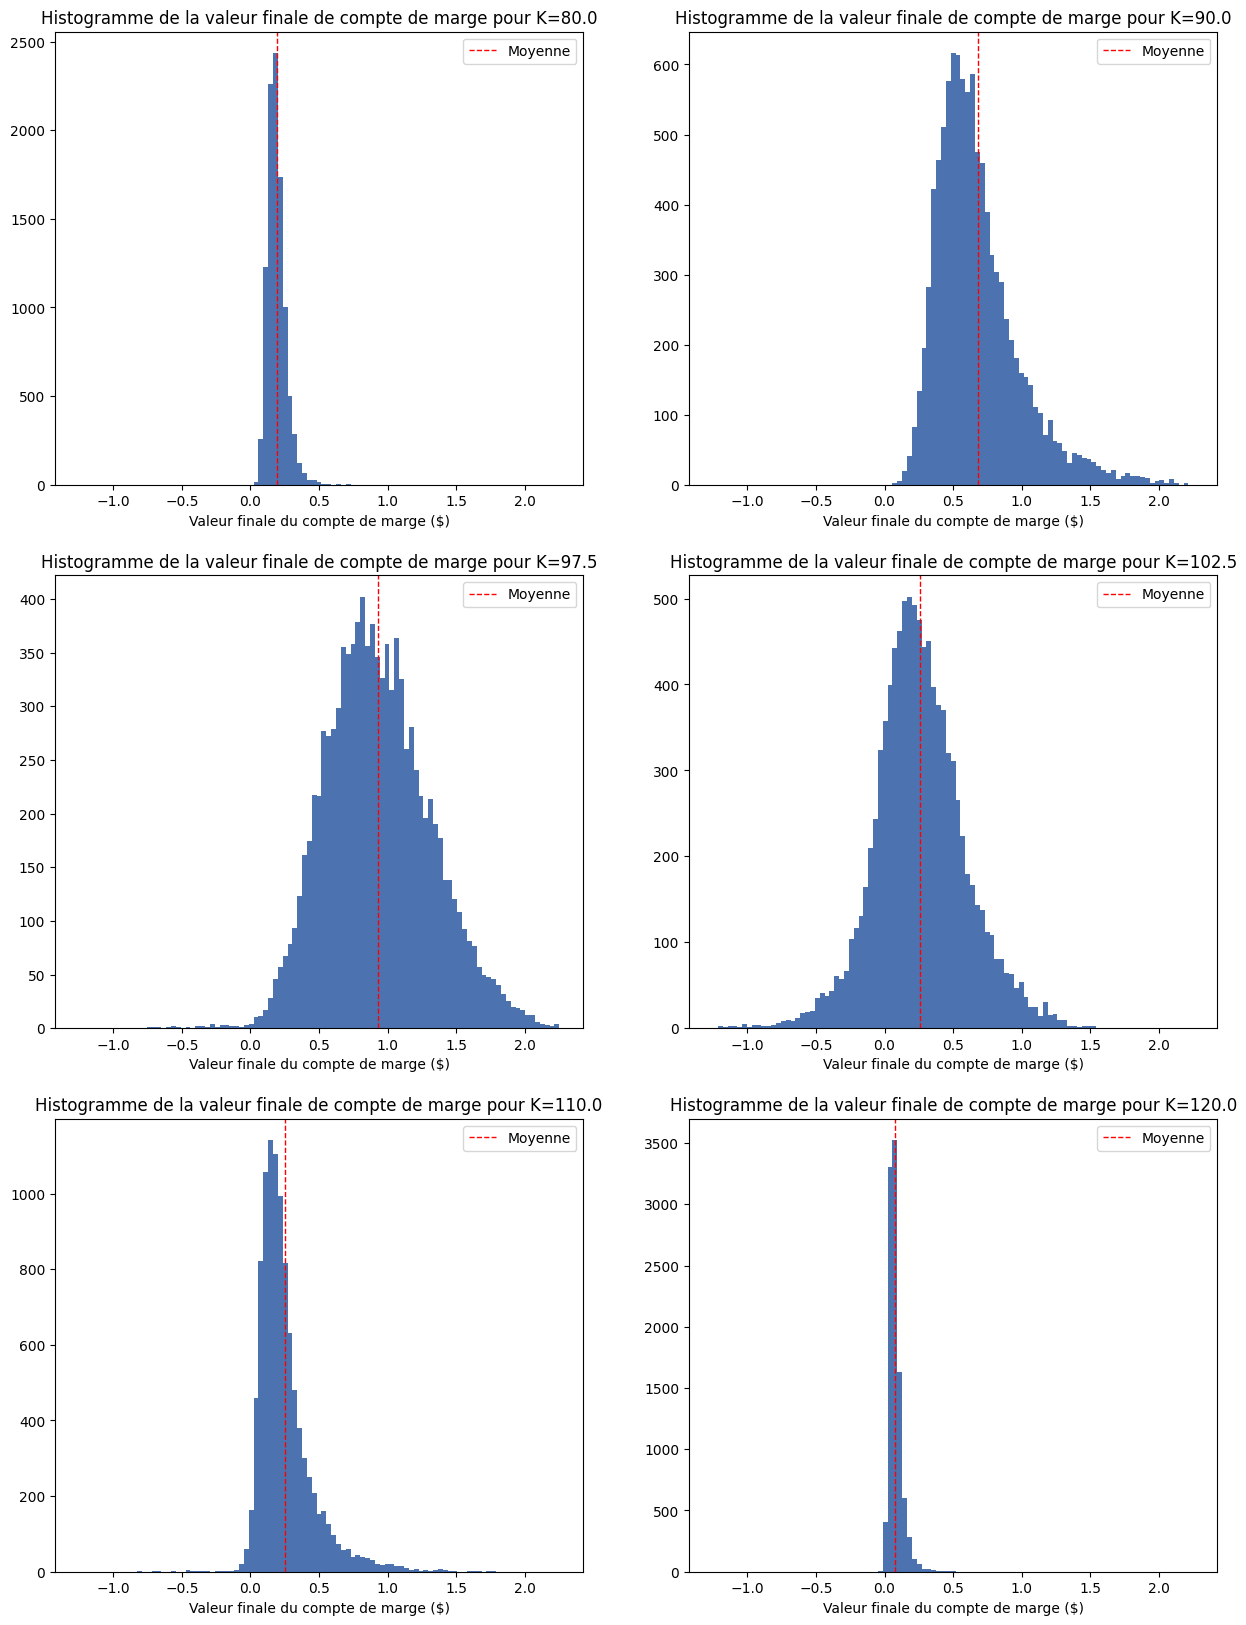

In [ ]:
profit = delta_hedging(
    S_t     = S_t, 
    T       = T, 
    dt      = dt,
    r       = r_f, 
    sigma_0 = sigma_0, 
    info    = info             
)

plot_delta_hist(profit, info)

Premièrement, l'hypothèse qu'on pose implicitement dans la formule de la volatilité utilisée pour la couverture est que la volatilité historique ($\sigma_0$) est constante durant la vie de l'option (1 mois). La validité de cette hypothèse dépend en premier lieu du choix de la série chronologique utilisée afin de calculer le $\sigma_0$ initialement. En effet, si tout les rendements depuis le début de la vie de l'actif sont utilisés dans le calcul de $\sigma_0$, l'hypothèse posée peut être valide car les volatilités sur le mois de la vie de l'option n'auront pas beaucoup de poids dans le calcul. Par contre, si la série chronologique prend seulement en compte les rendements dans la dernière année par exemple, alors la validité de l'hypothèse diminue (car les volatilités sur le mois de la vie de l'option aurait eu plus de poids donc auraient changées $\sigma_0$). Par contre, dans tout les cas, on peut dire que l'hypothèse n'est pas valide dans le cas où on fait une étude dans laquelle on simule des prix. En effet, dans ce cas, on se retrouvera inévitablement avec des rendements plus extrêmes qui auraient affecter la volatilité historique.

Pour ce qui est des histogrammes, on peut premièrement observer que plus le gamma de l'option est grand, plus il y a de la variabilité dans la distribution de la valeur du compte de marge à l'échéance (les gammas sont les plus grands pour les put avec les prix d'exercice de 97.5 et 102.5). Ce comportement est cohérant puisque, plus le gamma est élevé, plus l'erreur commise avec une stratégie de couverture par le delta est grande. En effet, comme la courbure est plus prononcée, l'approximation de la courbe à l'aide d'une droite (e.g. delta hedging) commet une plus grande erreur. C'est aussi ce qui explique que lorsqu'on est très profondément dans ou hors de la monnaie, la valeur finale du compte de marge est très concentrée autour d'une moyenne et cette moyenne est plus près de 0. Dans ces zones le prix de l'option est a peu près linéaire, de sorte que la converture par le delta est très efficace.

La raison pourquoi la distribution ne semble pas avoir une moyenne nulle est que nous ne couvrons pas vega. En effet, en vendant un put, nous sommes à découvert sur la volatilité du sous-jacent. La façon que la volatilité a été construite dans notre simulation est déterministe et non stochastique. Dans notre cas, la volatilité implicite est supérieure à la volatilité observé au temps 0. Au temps t = 0, nous utilisons la volatilité implicite et au t=T, nous utilisons la volatilité observé à t=0. Cela fait en sorte que la volatilité à chaque pas décroit jusqu'à atteindre la volatilité observé à t=0. Cela fait en sorte que nous avons une moyenne positive. Pour les écarts de moyenne entre les différents strikes, il faut savoir que vega atteint son maximum à la monnaie. Ce qui explique les moyennes plus élevé pour les strikes proche de la monnaie. 

 Discutez (sans les implémenter) des modifications et nuances que vous devriez apporter à votre analyse si les puts étaient américains? Donnez suffisamment de détails, en vous référant au besoin à des lignes de votre code, pour que l'on saisisse bien les difficultés et limites de l'exercice.

Si les puts étaient américains, on ne pourrait pas les évaluer à chaque pas de temps avec la formule fermée de BMS. On devrait plutôt utiliser un arbre binomial à chacune des évaluations. Cette procédure serait beaucoup plus coûteuse en terme de temps de calcul. Par exemple, si on utilise un arbre avec 2000 noeuds, qu'on garde les mêmes paramètres de simulation et qu'on se assume un temps de calcul de 0.3 seconde pour un put américain sous ces contraintes (environ le temps que notre code prend), alors le temps de calcul total serait d'environ 17.5 heures pour un seul put. L'approximation est grossière, mais on voit quand même que dans le cas du put américain, le temps de calcul constitue une limitation.

Une autre difficulté dans le cas de la couverture du put américain est qu'on doit prendre en compte le fait qu'il est possible que l'option soit exercé à tout moment. C'est donc dire que si on effectue la couverture à chaque fin de journée et que le détenteur de l'option décide d'exercer juste avant la fin de la journée, on ne sera pas couvert pour la variation du sous-jacent dans la journée. Cela peut être un problème majeur, surtout si le prix du sous-jacent a varié de façon importante. Une solution à ce problème pourrait être d'augmenter la fréquence de couverture. Or, si on prend en compte les frais de transactions, cette option peut devenir coûteuse.

In [ ]:
toc()

Elapsed time: 29.933870 seconds.

